In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rand
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
def is_metric(G):
    shortest = dict(nx.floyd_warshall(G))
    for u, v, datadict in G.edges(data=True):
        if abs(shortest[u][v] - datadict['weight']) >= 0.00001:
            return False
    return True


def drawVertices(G,x):
    for i in range(x):
        G.add_node(i)
    return


def drawEdges(G,percentage):
    nodes = G.nodes()
    lim = 1/percentage
    for n in nodes:
        for m in nodes:
            if n != m:
                a = rand.randint(1,lim)
                if n != m and a == 1:
                    G.add_edge(n,m)     
    return



def drawEdgesConnected(G,perc):
    drawEdges(G,perc)
    ensureAllConnected(G)
    return


def ensureAllConnected(G):
    nodes = G.nodes()
    while not nx.is_connected(G):
        n = rand.randint(1,len(nodes) -1)
        m = rand.randint(1,len(nodes) -1)
        while m in nx.node_connected_component(G,n):
            m = rand.randint(1,len(nodes) -1)
        G.add_edge(n,m)
    return
 
    
def selectRandPartner(G,n):
    m = n
    nodes = G.nodes()
    while (m == n):
        m = rand.randint(1, len(nodes)-1)
        print(m)
    return m


def generateRandomMetricGraph(N, per):
    V = N # number of nodes
    D = 2 # dimensionality

    positions = 10*np.random.rand(V, D)
    differences = positions[:, None, :] - positions[None, :, :]
    distances = np.sqrt(np.sum(differences**2, axis=-1)) # euclidean
    # create a weighted, directed graph in networkx
    graph = nx.from_numpy_matrix(distances, create_using=nx.Graph())
    nodes = graph.nodes()
    np.random.seed(1)
    for n in nodes:
        for m in nodes:
            if n != m and graph.has_edge(n,m):
                num = np.random.randint(low = 1, high = 1000, size = 1)
                if (num/1000) > per:
                    graph.remove_edge(n,m)
                    if not nx.is_connected(graph):
                        graph.add_edge(n,m, weight = distances[n][m])
    return graph






def printNodes(G):
    nodes = G.nodes()
    for n in nodes:
        print(n,end = " ")
    print()
    return;


def selectNumTAs(G):
    nodes = G.nodes()
    np.random.seed(1)
    if (len(nodes) < 50):
        #do stuff
        numTAs = np.random.randint(low = 5, high = min(22,len(nodes) - 4), size = 1)
    elif (len(nodes) < 100):
        #do stuff
        numTAs = np.random.randint(low = 25, high = min(45,len(nodes) - 8), size = 1)
    else:
        #do stuff
        numTAs = np.random.randint(low = 50, high = min(90,len(nodes) - 10), size = 1)
    return numTas[0]
    


def selectTAs(numTAs):
    taHomes = np.random.randint(low = 1, high = len(nodes)-1, size = numTAs)
    print(numTAs[0])
    for i in taHomes:
        print(i, end = " ")
    print()
        
        
    

def printAdjacencyMatrix(G):
    nodes = G.nodes()
    for n in nodes:
        for m in nodes:
            if (G.has_edge(n,m)):
                print("%.5f" %G[n][m]['weight'],end = " ")
            else:
                print('x', end = " ")
        print()
    return


def createOutput(G):
    print(len(G.nodes))
    numTAs = selectNumTAs(G)
    print(numTAs)
    printNodes(G)
    selectTAs(numTAs)
    printAdjacencyMatrix(G)




In [3]:


G = nx.Graph()
drawVertices(G,20)
drawEdgesConnected(G,0.1)

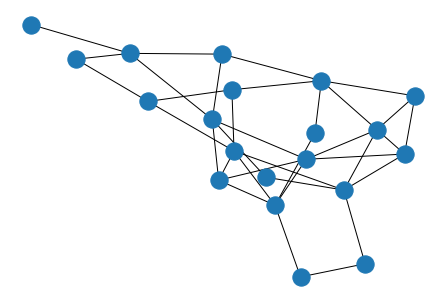

In [4]:
nx.draw(G)

In [5]:
#G2 = nx.random_geometric_graph(20, 0.1)
#nx.draw(G2)

In [ ]:


G = generateRandomMetricGraph(180,0.25)
nx.draw(G)
print(is_metric(G))
print(nx.is_connected(G))


In [ ]:
createOutput(G)